# Stem Method Example 
This notebook is used to showcase the power of stem method, explained in detial in 
"SKA Weak Lensing III: Added Value of Multi-Wavelength Synergies for the Mitigation of Systematics" by Camera et al. (https://arxiv.org/abs/1606.03451).
In case you notice any errors please raise an issue. If you want to contact me, please do so at nikolina.sarcevic@gmail.com

In [1]:
from derivative_calculator import DerivativeCalculator
import numpy as np

In [2]:
# Define functions to calculate derivatives of
functions_dict = {
    'linear': lambda x: 2 * x + 3,
    'quadratic': lambda x: x ** 2 - 4 * x + 2,
    'cubic': lambda x: 2 * x + x ** 3,
    'trigonometric': lambda x: np.sin(x),
    'exponential': lambda x: np.exp(x),
    'logarithmic': lambda x: np.log(x + 1) if x > 0 else 0  # Avoid log(0)
}

In [3]:
# Example usage
# Create a DerivativeCalculator object
# Choose a function and the central value 
calc = DerivativeCalculator(functions_dict["cubic"], 10) 
noise_std = 1.5  # Standard deviation of the noise
iterations = 1000  # Number of iterations to run

stem_derivative = calc.stem_method()
print(f"Stem Method Derivative: {stem_derivative:.2f}")
stencil_derivative = calc.five_point_stencil_method()
print(f"Five-Point Stencil Derivative: {stencil_derivative:.2f}")


Stem Method Derivative: 319.65
Five-Point Stencil Derivative: 302.00


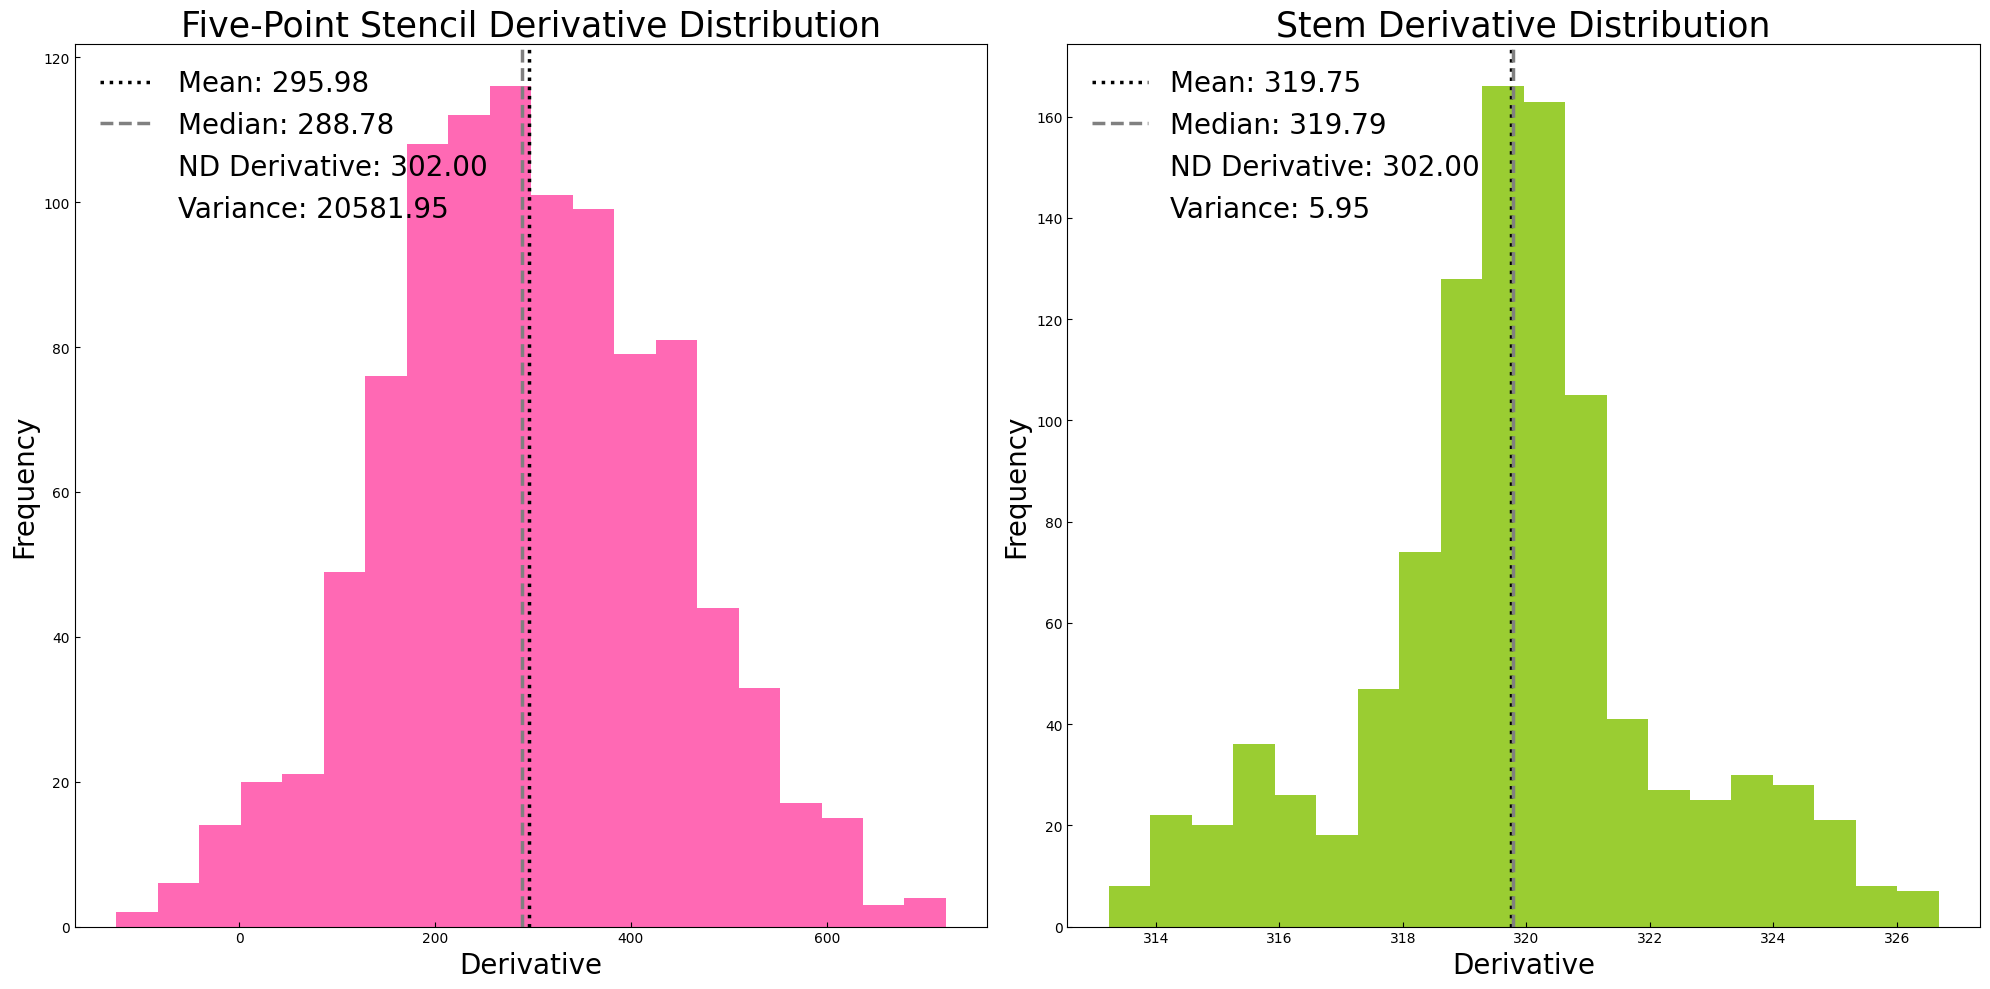

In [4]:
# Calculate derivatives with noise
# First use the 'five_point_stencil' method to calculate the derivatives
# Output will be a list of values, each value is the derivative calculated at a point
five_point_distr = calc.calculate_derivatives_with_output_noise(method='five_point_stencil',
                                                                iterations=iterations, 
                                                                noise_std=noise_std)
# Now use the 'stem' method to calculate the derivatives
# Output will be a list of values, each value is the derivative
stem_distr = calc.calculate_derivatives_with_output_noise(method='stem',
                                                          iterations=iterations,
                                                          noise_std=noise_std)

# Plot the distributions using the plot_derivative_distributions method
# Not that the noise is Gaussian so the distributions should be normal
# but the output will vary depending on the noise every time the code is run!!!
calc.plot_derivative_distributions(five_point_distr, 
                                   stem_distr, 
                                   method1_name='Five-Point Stencil',
                                   method2_name='Stem',
                                   bins=20)


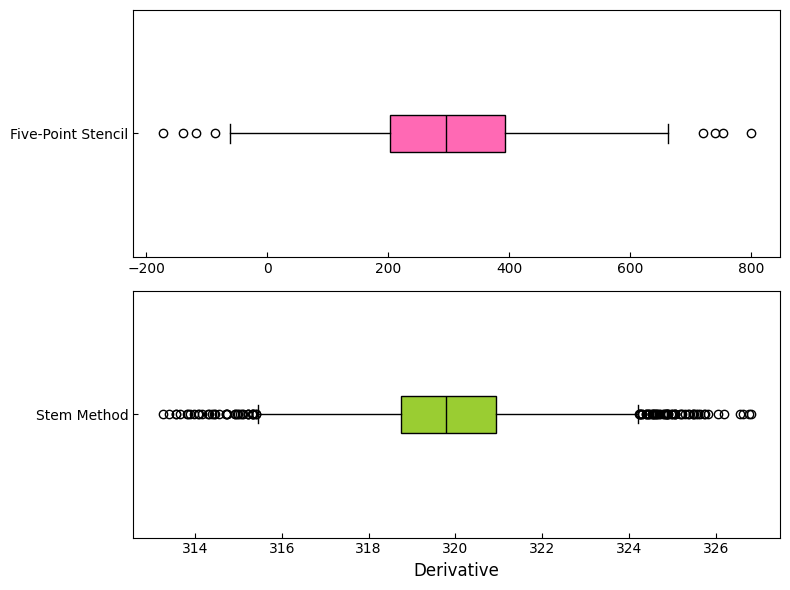

In [5]:
# Another way to demonstrate the power of the stem method visually is to 
# use a box plot. Use a built-in function
calc.plot_derivatives_boxplot(iterations=iterations, noise_std=noise_std)


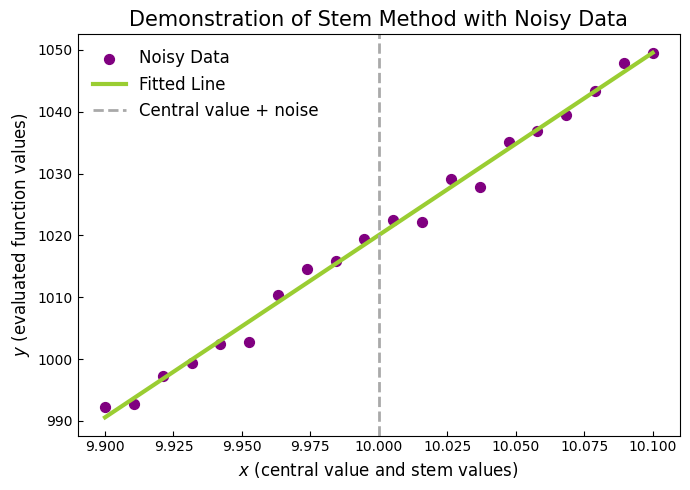

In [6]:
# Demonstrate the stem method using a built-in function
calc.demonstrate_stem_method(num_points=20, noise_std=noise_std)
